https://stepik.org/lesson/1370109/step/6

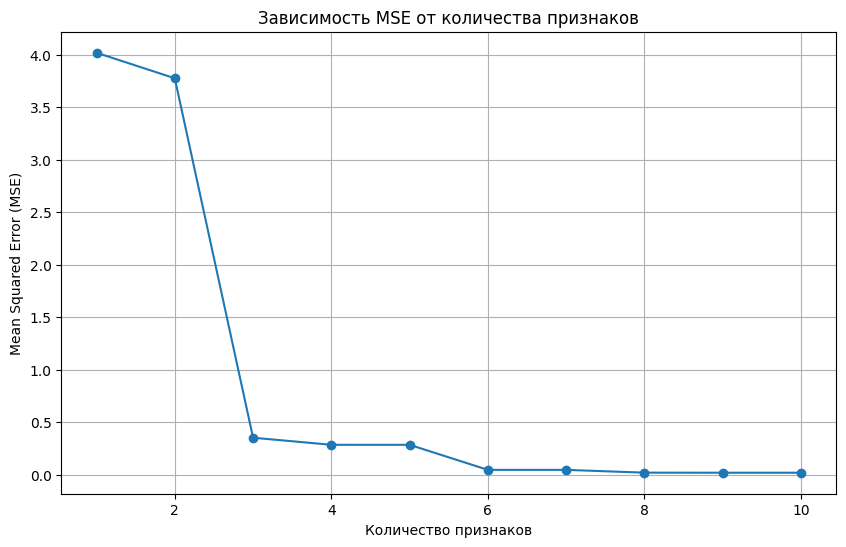

In [ ]:
import numpy as np


def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 3


coord_x = np.arange(-4.0, 6.0, 0.1)
coord_y = func(coord_x)
K = 10
X = np.array([[xx**i for i in range(K)] for xx in coord_x]) # обучающая выборка для поиска коэффициентов модели
Y = coord_y

X_train = X[::2]  # обучающая выборка (входы)
Y_train = Y[::2]  # обучающая выборка (целевые значения)

L, W = np.linalg.eig(X_train.T @ X_train  / len(X_train))

WW = sorted(zip(L, W), key=lambda lx: lx[0], reverse=False)
WW = np.array([w[1] for w in WW])

G_new = X @ WW.T        # переносим признаки в новое пространство
G = G_new[:, :7]        # уменьшаем число признаков до 7
XX_train = G[::2]   # новое признаковое пространство, прореженное до размера Y_train

# Аналитически находим веса по формуле w_∗​=(X^T⋅X)^{−1}⋅X^T⋅Y:
w_new = np.linalg.inv(XX_train.T @ XX_train) @ XX_train.T @ Y_train

predict = G @ w_new

'''ГРАФИК'''
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Q = []
for n in range(1, 11):  # n - число признаков, которые оставляем
    G_plot = G_new[:, :n]        # уменьшаем число признаков до 7
    X_plot = G_plot[::2]   # новое признаковое пространство, прореженное до размера Y_train
    w_plot = np.linalg.inv(X_plot.T @ X_plot) @ X_plot.T @ Y_train
    pred = G_plot @ w_plot
    Q.append(mean_squared_error(pred, Y))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), Q, marker='o')
plt.title('Зависимость MSE от количества признаков')
plt.xlabel('Количество признаков')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()